# Walmart Sales advance analysis and prediction

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
traindf = pd.read_csv("./walmart-recruiting-store-sales-forecasting/train.csv")
testdf = pd.read_csv("./walmart-recruiting-store-sales-forecasting/test.csv")
featuredf = pd.read_csv("./walmart-recruiting-store-sales-forecasting/features.csv")
storedf=pd.read_csv("./walmart-recruiting-store-sales-forecasting/stores.csv")

In [3]:
print(traindf.shape)
traindf.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
print(testdf.shape)
testdf.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
print(featuredf.shape)
print(featuredf.columns)
featuredf.head()

(8190, 12)
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
print(storedf.shape)
storedf

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
### merging the features and training and store data
datadf = traindf.merge(featuredf,how='left',indicator=True).merge(storedf,how='left')
print(datadf.shape)
print("train : ", traindf.columns)
print("feature : ", featuredf.columns)
print("store : ", storedf.columns)
datadf

(421570, 17)
train :  Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
feature :  Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
store :  Index(['Store', 'Type', 'Size'], dtype='object')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


### Removing null valued column

In [8]:
# Markdown values are typically a promotional factors and it contains 58% null values,
# So here Im avoiding it to perform neat analysis.
print("Percent of NAN values in features\n",(datadf.isna().sum()*100)/421570)

Percent of NAN values in features
 Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
_merge           0.000000
Type             0.000000
Size             0.000000
dtype: float64


In [9]:
df = datadf.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','_merge'],axis=1)

print(df.columns)
print(df.shape)
df

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')
(421570, 11)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [10]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

### Checking Outliers on sales value

In [11]:
#checking negative sales
print("Negative sales = ",df.loc[df['Weekly_Sales']<=0].shape)
print("Positive sales = ",df.loc[df['Weekly_Sales']>0].shape)

Negative sales =  (1358, 11)
Positive sales =  (420212, 11)


In [12]:
# remove negative sales
train = df.loc[df['Weekly_Sales']>0]
train.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


In [13]:
print(train.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')


### Analysis using graph 

In [14]:
print("Type: ",train['Type'].unique())

Type:  ['A' 'B' 'C']


A    214961
B    162787
C     42464
Name: Type, dtype: int64


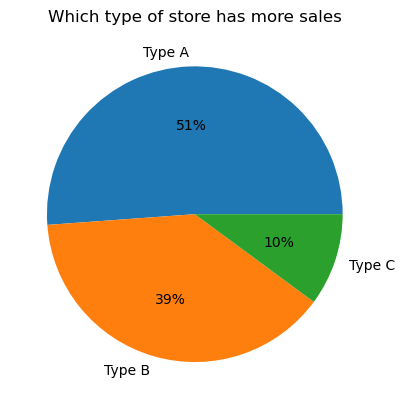

In [15]:
import matplotlib.pyplot as plt
#creating dataset
stores = ['Type A','Type B','Type C']
datapoints = train['Type'].value_counts()
print(datapoints)
plt.title("Which type of store has more sales")
plt.pie(datapoints,labels=stores,autopct='%.0f%%') #%.0f gives 51 , %.0f%% gives 51%

plt.show()

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024258     -0.085117  -0.000522    -0.050230   
Dept          0.024258  1.000000      0.148749   0.000663     0.004727   
Weekly_Sales -0.085117  0.148749      1.000000   0.012843    -0.002339   
IsHoliday    -0.000522  0.000663      0.012843   1.000000    -0.155775   
Temperature  -0.050230  0.004727     -0.002339  -0.155775     1.000000   
Fuel_Price    0.065321  0.003544      0.000089  -0.078155     0.143700   
CPI          -0.211261 -0.007178     -0.021162  -0.001933     0.182223   
Unemployment  0.208759  0.007787     -0.025806   0.010555     0.096768   
Size         -0.182763 -0.002491      0.244117   0.000797    -0.058413   

              Fuel_Price       CPI  Unemployment      Size  
Store           0.065321 -0.211261      0.208759 -0.182763  
Dept            0.003544 -0.007178      0.007787 -0.002491  
Weekly_Sales    0.000089 -0.021162     -0.025806  0.244117  
IsHoliday      

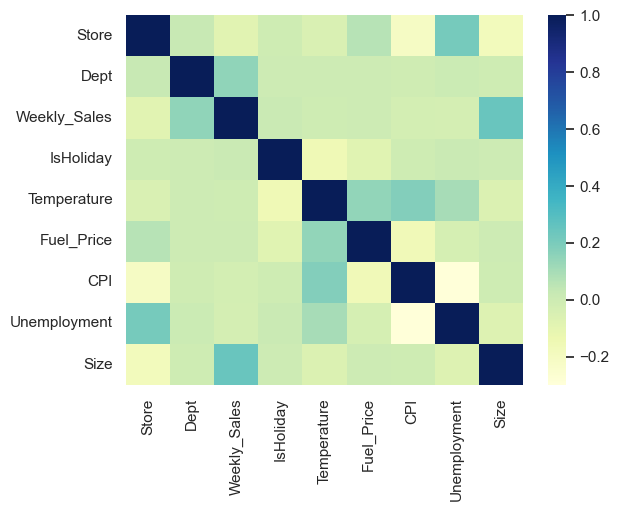

In [16]:
#correlation between data
import seaborn as sns
print(train.corr())
sns.set_theme(style="whitegrid")
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu")# , annot=True will show values
sns.set(rc = {'figure.figsize':(5,5)})
plt.show()

In [17]:
print(train.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object


In [18]:
train['Year'] = pd.DatetimeIndex(train['Date']).year
train.shape

/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_28371/2081804553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Year'] = pd.DatetimeIndex(train['Date']).year


(420212, 12)

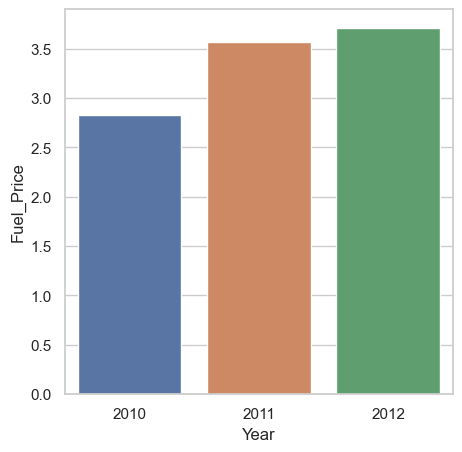

In [19]:
# fuelprice
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Year", y="Fuel_Price", data=train)
sns.set(rc = {'figure.figsize':(10,4)})

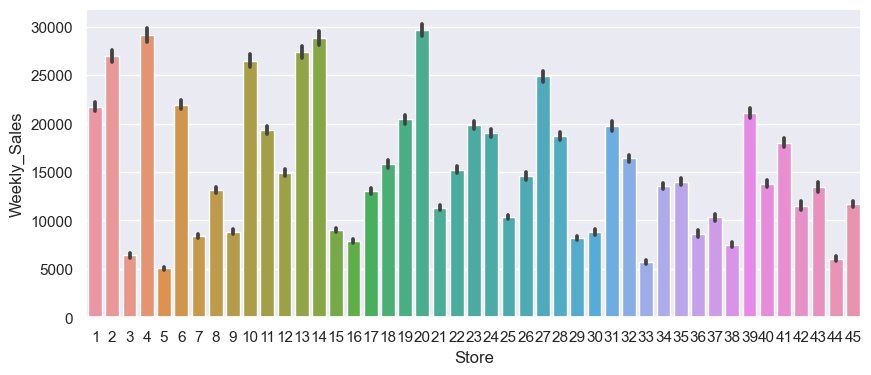

In [20]:
ax = sns.barplot(x="Store", y="Weekly_Sales", data=train)
sns.set(rc = {'figure.figsize':(10,4)})

<AxesSubplot:xlabel='Store', ylabel='Unemployment'>

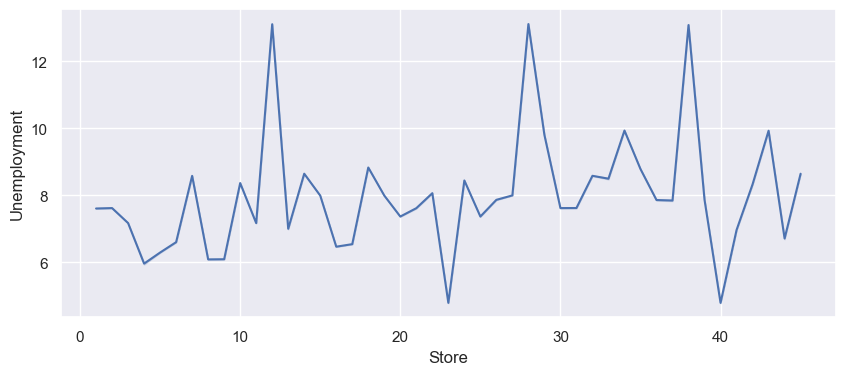

In [21]:
#Store vs unemployment
sns.lineplot(x="Store", y="Unemployment", data=train)

In [22]:
#department vs weekly sales
train['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

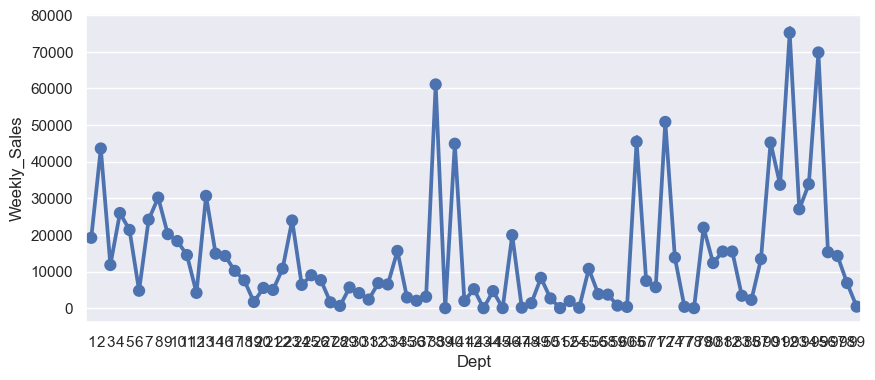

In [23]:
sns.pointplot(x="Dept", y="Weekly_Sales", data=train)
sns.set(rc = {'figure.figsize':(45,8)})

In [24]:
#creating month and week column
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Week'] = pd.DatetimeIndex(train['Date']).week
train.shape

/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_28371/264771988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month'] = pd.DatetimeIndex(train['Date']).month
/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_28371/264771988.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['Week'] = pd.DatetimeIndex(train['Date']).week
/var/folders/wp/x37vt6v52m7fgw1jdf8c_mj00000gn/T/ipykernel_28371/264771988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

(420212, 14)

In [25]:
train=train.drop(['Date'],axis=1)
train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,6
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,7
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,8
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,192.013558,8.684,B,118221,2012,9,39
421566,45,98,628.10,False,64.89,3.985,192.170412,8.667,B,118221,2012,10,40
421567,45,98,1061.02,False,54.47,4.000,192.327265,8.667,B,118221,2012,10,41
421568,45,98,760.01,False,56.47,3.969,192.330854,8.667,B,118221,2012,10,42


<AxesSubplot:xlabel='Month'>

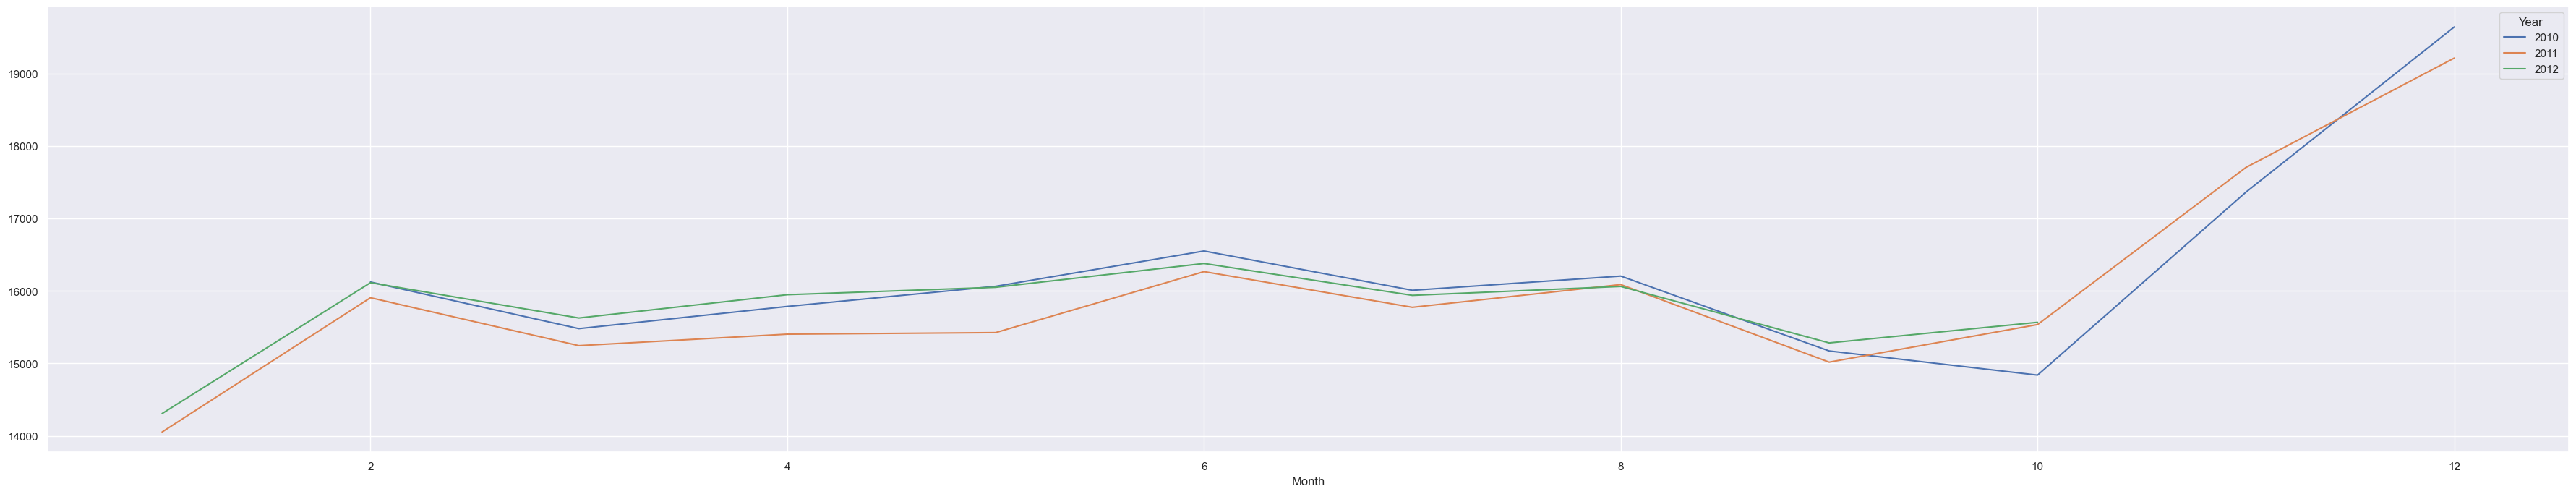

In [26]:
month_wise_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot()

### Label Encoding. Holiday (True,False) to Holiday(1,0) 

In [27]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()
#encoding
train['IsHoliday'] = label_enc.fit_transform(train['IsHoliday'])
train['Type'] = label_enc.fit_transform(train['Type'])
train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


### Feature Importance Test using various techniques

In [28]:
X = train.drop(['Weekly_Sales'],axis=1)
y = train['Weekly_Sales']
X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,0,64.88,3.997,192.013558,8.684,1,118221,2012,9,39
421566,45,98,0,64.89,3.985,192.170412,8.667,1,118221,2012,10,40
421567,45,98,0,54.47,4.000,192.327265,8.667,1,118221,2012,10,41
421568,45,98,0,56.47,3.969,192.330854,8.667,1,118221,2012,10,42


In [29]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators=100)

In [31]:
rf.fit(X,y)

RandomForestRegressor()

<BarContainer object of 12 artists>

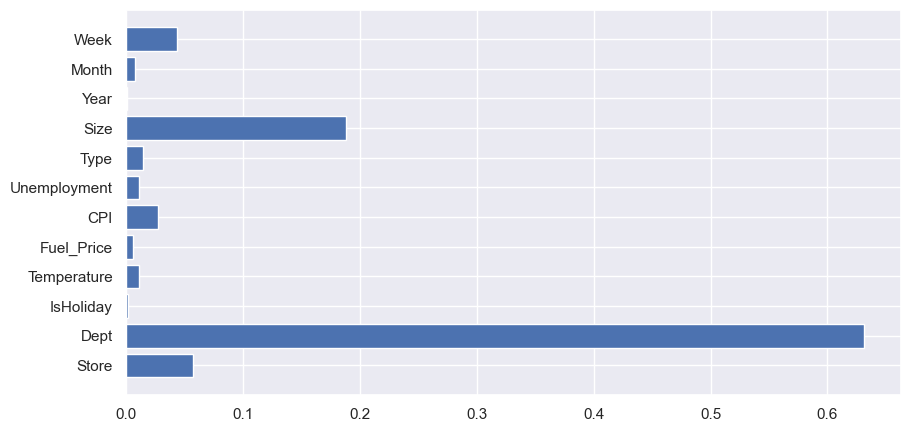

In [32]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.barh(X.columns,rf.feature_importances_)

In [33]:
# year is insignificant also isholiday
X=X.drop(["IsHoliday",'Year'],axis=1)

In [48]:
print(X.shape) 
print(X.columns)

(420212, 10)
Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Type', 'Size', 'Month', 'Week'],
      dtype='object')


# Modeling

### Decision Tree

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.25)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [36]:
print(np.shape(X_train))
print( np.shape(y_train))

(315159, 10)
(315159,)


In [37]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred = DTRmodel.predict(X_test)

In [38]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.3796166061691
MSE score  : 323184793.8287025
RMSE:  17977.34112233237


### regressor

In [39]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(X_train,y_train)
y_pred1 = rf1.predict(X_test)

In [40]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.3796166061691
MSE score  : 62845166.705938146
RMSE:  7927.494352311968


### Boosting

In [41]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred2 = model.predict(X_test)

In [43]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))

R2 score  : 0.9444449403000315
MSE score  : 28941055.95639064
RMSE:  5379.689206300922


## Regularization
### to remove overfitting

In [44]:
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(X_train,y_train)

Ridge(alpha=0.5)

In [45]:
y_pred3 = model.predict(X_test)

In [46]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9444449403000315
MSE score  : 28941055.95639064
RMSE:  5379.689206300922


In [47]:
y_test

198556    18526.46
342491       84.00
267645    27025.56
169044    48324.54
45102      2968.68
            ...   
323292     4156.69
22041     15252.97
261294     8461.31
212048      835.99
406506     6728.27
Name: Weekly_Sales, Length: 105053, dtype: float64